In [1]:
# library imports:
# mesa
from mesa import Agent, Model
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner
# load all available schedulers
import mesa.time as time
import math
import random
# matplot lib for plotting, numpy for all sorts of useful math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# basic python statistics
import statistics as stat

# import pandas
import pandas as pd

# Required libraries for animation
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc, collections
from IPython.display import HTML


from main import RecyclingModel

In [2]:
def run_model():
   model = RecyclingModel()
   number_of_steps = 240
   for i in range(number_of_steps):
      model.step()
   return model.datacollector_waste.get_model_vars_dataframe()

NameError: name 'moving_averages' is not defined

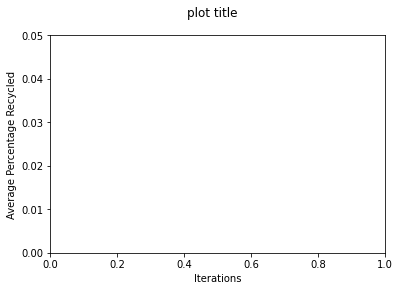

In [4]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
plt.ylabel('Average Percentage Recycled')
plt.xlabel('Iterations')
plt.suptitle('plot title')
plt.ylim((0,0.05))
ax.plot(moving_averages)
plt.savefig("convergence")

In [3]:
param_set = [{"Knowledge": False, "Perception": False, "Knowledge + perception": False, "Technology": False}, \
             {"Knowledge": True, "Perception": False, "Knowledge + perception": False, "Technology": False}, \
             {"Knowledge": False, "Perception": True, "Knowledge + perception": False, "Technology": False}, \
             {"Knowledge": False, "Perception": False, "Knowledge + perception": True, "Technology": False}, \
             {"Knowledge": False, "Perception": False, "Knowledge + perception": False, "Technology": True}]

In [4]:
frames = {}
value_kpi_per_run = {0:{"Rotterdam":[], "Schiedam":[], "Vlaardingen":[]}, 1:{"Rotterdam":[], "Schiedam":[], "Vlaardingen":[]}, 2:{"Rotterdam":[], "Schiedam":[], "Vlaardingen":[]}, 3:{"Rotterdam":[], "Schiedam":[], "Vlaardingen":[]}, 4:{"Rotterdam":[], "Schiedam":[], "Vlaardingen":[]}}

In [5]:
for i, policy in enumerate(param_set):
    print(policy)
    for j in range(50):
        model = RecyclingModel(policies = policy)
        model.run_model()
        if j == 0:
            dataframe_prev_run=model.datacollector_waste.get_model_vars_dataframe()
            value_kpi_per_run[i]["Rotterdam"].append(dataframe_prev_run["Percentage recycled Rotterdam"][1:241].mean())
            value_kpi_per_run[i]["Vlaardingen"].append(dataframe_prev_run["Percentage recycled Vlaardingen"][1:241].mean())
            value_kpi_per_run[i]["Schiedam"].append(dataframe_prev_run["Percentage recycled Schiedam"][1:241].mean())
        else:
            dataframe_this_run=model.datacollector_waste.get_model_vars_dataframe()
            value_kpi_per_run[i]["Rotterdam"].append(dataframe_this_run["Percentage recycled Rotterdam"][1:241].mean())
            value_kpi_per_run[i]["Vlaardingen"].append(dataframe_this_run["Percentage recycled Vlaardingen"][1:241].mean())
            value_kpi_per_run[i]["Schiedam"].append(dataframe_this_run["Percentage recycled Schiedam"][1:241].mean())
            df = pd.concat([dataframe_prev_run, dataframe_this_run])
            df = df.groupby(level=0).mean()
            dataframe_prev_run=dataframe_this_run
    dataframe = df[1:241]
    frames[i] = dataframe

{'Knowledge': False, 'Perception': False, 'Knowledge + perception': False, 'Technology': False}
{'Knowledge': True, 'Perception': False, 'Knowledge + perception': False, 'Technology': False}
{'Knowledge': False, 'Perception': True, 'Knowledge + perception': False, 'Technology': False}
{'Knowledge': False, 'Perception': False, 'Knowledge + perception': True, 'Technology': False}
{'Knowledge': False, 'Perception': False, 'Knowledge + perception': False, 'Technology': True}


In [142]:
dataframe

,Waste Rotterdam,Waste Vlaardingen,Waste Schiedam,Recycled plastic waste Rotterdam,Recycled plastic waste Vlaardingen,Recycled plastic waste Schiedam,Percentage recycled Rotterdam,Percentage recycled Vlaardingen,Percentage recycled Schiedam
1,12004.536613,1196.011858,2803.609603,285.235153,28.009488,66.302727,0.023761,0.023421,0.023649
2,11891.734903,1184.432119,2785.068515,282.629201,27.719675,65.807534,0.023767,0.023400,0.023631
3,11836.840202,1173.103940,2754.519080,281.439498,27.522528,64.962277,0.023777,0.023461,0.023587
4,11753.583357,1174.842333,2737.064262,279.285335,27.523653,64.638895,0.023762,0.023428,0.023617
5,11709.690415,1165.216157,2728.053453,278.293741,27.297519,64.422082,0.023766,0.023426,0.023611
...,...,...,...,...,...,...,...,...,...
236,9154.576067,916.857625,2144.393368,444.069848,43.744700,103.397593,0.048508,0.047711,0.048216
237,9150.244790,916.771808,2130.478928,443.595325,43.789470,102.606660,0.048479,0.047772,0.048157
238,9107.725579,912.601340,2131.286246,441.666253,43.612880,102.673124,0.048494,0.047798,0.048177
239,9128.047257,910.731803,2125.294794,442.649595,43.500848,102.348939,0.048493,0.047767,0.048155


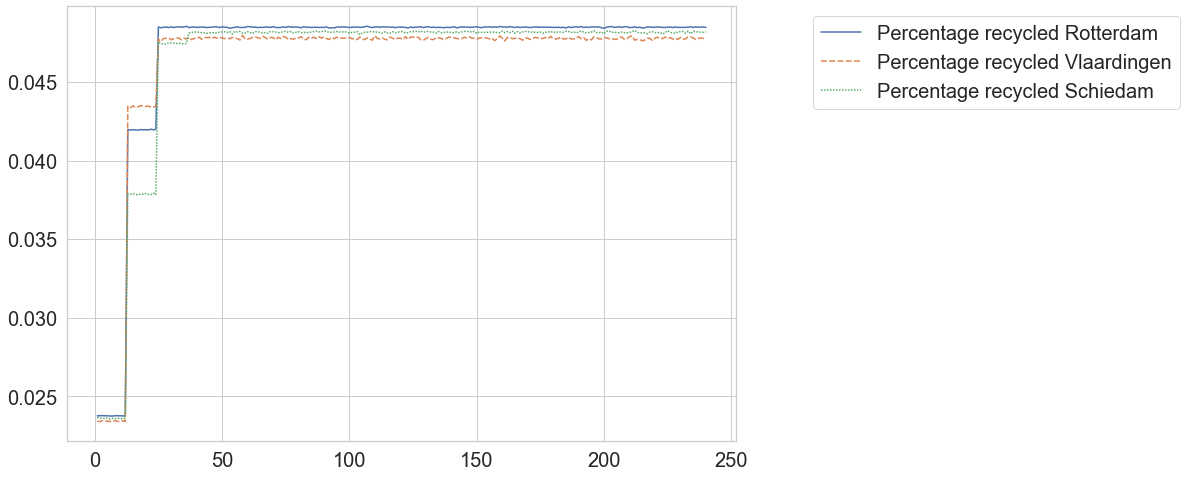

In [6]:
frames[2]["Percentage recycled Schiedam"][1:241]

2      0.027411
3      0.032088
4      0.036698
5      0.041299
6      0.046245
         ...   
236    2.359065
237    2.367217
238    2.374819
239    2.389570
240    2.395782
Name: Percentage recycled Schiedam, Length: 239, dtype: float64

NameError: name 'mean' is not defined

In [6]:
df= pd.DataFrame.from_dict(value_kpi_per_run)
df.index.name = 'City'
df.reset_index(level=0, inplace=True)
df.rename(columns={0: "No policy", 1: "Policy 1", 2: "Policy 2", 3: "Policy 3", 4: "Policy 4"}, inplace=True)
df

,City,No policy,Policy 1,Policy 2,Policy 3,Policy 4
0,Rotterdam,"[0.04451436392418409, 0.04737280862369498, 0.0...","[0.05551914651186334, 0.05760743520158882, 0.0...","[0.06407096996694382, 0.06602528028069381, 0.0...","[0.07695550878869496, 0.07565793705513119, 0.0...","[0.04693268890442534, 0.045507615604185175, 0...."
1,Schiedam,"[0.04078533368974185, 0.04470796721018561, 0.0...","[0.054305289773621854, 0.05005676170536152, 0....","[0.06343817601605445, 0.058728349050759236, 0....","[0.07846884089132683, 0.07384602793020296, 0.0...","[0.04490672777135093, 0.04296321162742287, 0.0..."
2,Vlaardingen,"[0.04895523367583003, 0.04251514533552541, 0.0...","[0.057316461344282414, 0.05706619810841137, 0....","[0.0720494613434546, 0.06441479945344901, 0.06...","[0.07528581285552093, 0.0705054279221682, 0.07...","[0.0417615015401792, 0.045436967652906037, 0.0..."


In [7]:
import seaborn as sns
dd=pd.melt(df,id_vars=['City'],value_vars=["No policy","Policy 1", "Policy 2", "Policy 3", "Policy 4"],var_name='Policy')

In [8]:
dd=dd.explode('value')
dd['Percentage recycled'] = dd['value']*100

In [9]:
dd.drop(['value'], axis=1, inplace=True)

In [10]:
dd.columns

Index(['City', 'Policy', 'Percentage recycled'], dtype='object')

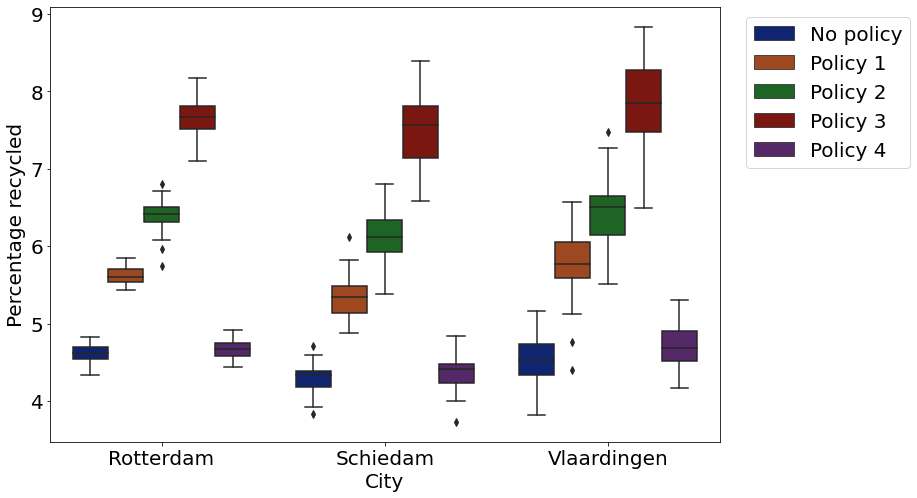

In [11]:
# TODO: change names of x and y axes
# Change names of policies
# colors are not clear yet. 

fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.rc('legend', fontsize=20)
#sns.set_style(style="whitegrid")
sns.boxplot(x='City',y='Percentage recycled',data=dd,hue='Policy', palette='dark')
ax.legend(bbox_to_anchor=(1.3, 1))

plt.savefig("Experiments", bbox_inches='tight')

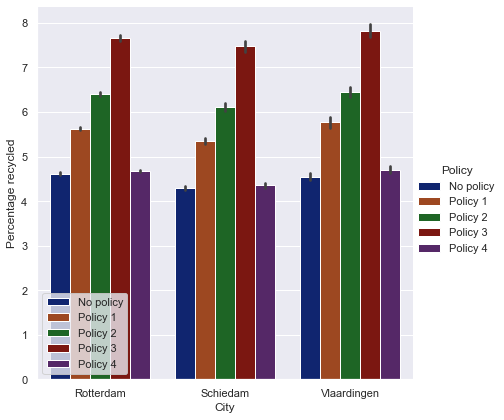

In [12]:


sns.set(rc = {'figure.figsize':(15,18)})

g = sns.catplot(
    data=dd, kind="bar",
    x="City", y="Percentage recycled", hue="Policy",
     palette="dark", alpha=1, height=6
)

#ns.set_style(style="whitegrid")
#lt.grid()
plt.legend()
plt.savefig("Barplot", bbox_inches='tight')

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


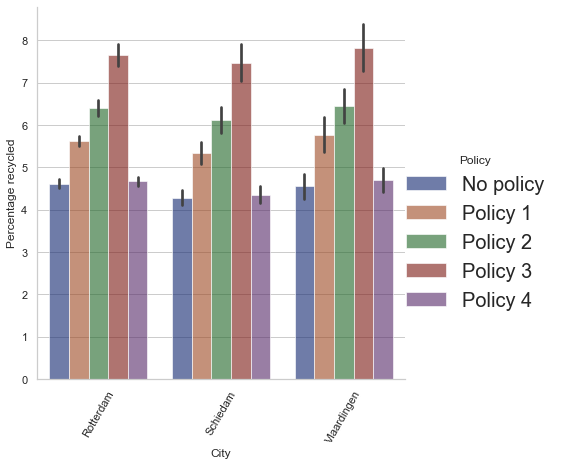

In [13]:
data = dd

#fig, ax = plt.subplots(figsize=(12,8))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.rc('legend', fontsize=20)
sns.set_style(style="whitegrid")
g = sns.catplot(
    data=dd, kind="bar",
    x="City", y="Percentage recycled", hue="Policy",
    ci="sd", ax=ax, palette="dark", alpha=.6, height=6
)
#data.groupby(['Policy', 'City',]).mean().unstack(0).plot(kind="bar", ax=ax, palette='dark')
plt.xticks(rotation=60)
ax.legend(["No policy", "Policy 1", "Policy 2", "Policy 3", "Policy 4"], bbox_to_anchor=(1.01, 1))
ax.set_ylabel('Percentage recycled')
plt.savefig("Barplots.png", bbox_inches='tight')

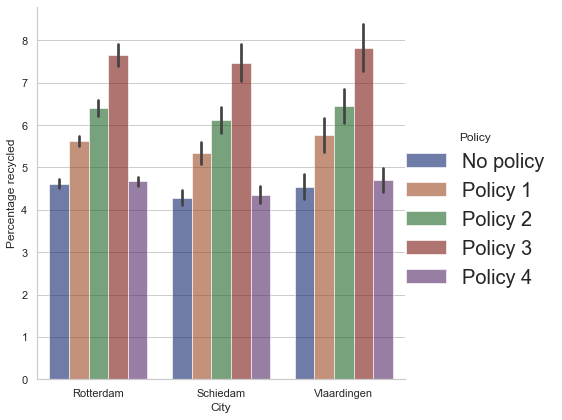

In [14]:
data = dd.groupby(['Policy', 'City']).mean().unstack(0)
g = sns.catplot(
    data=dd, kind="bar",
    x="City", y="Percentage recycled", hue="Policy",
    ci="sd", palette="dark", alpha=.6, height=6
)

In [234]:
dd.columns

Index(['City', 'Policy', 'Percentage recycled'], dtype='object')

In [150]:
value_kpi_per_run[2]["Rotterdam"][1]

0.06472587392420258

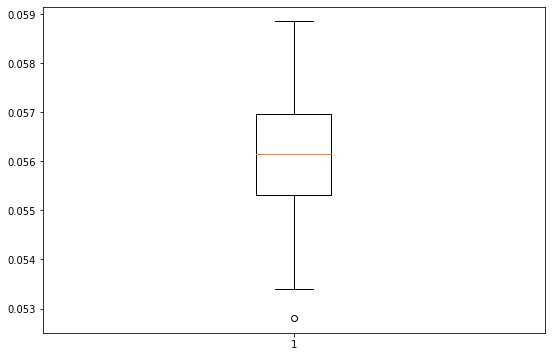

In [110]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(value_kpi_per_run[1]["Rotterdam"])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

AttributeError: module 'pandas' has no attribute 'Panel'

In [71]:
df = pd.concat([frames[1], frames[2]])
foo = df.groupby(level=0).mean()
foo.head()

                

,Waste Rotterdam,Waste Vlaardingen,Waste Schiedam,Recycled plastic waste Rotterdam,Recycled plastic waste Vlaardingen,Recycled plastic waste Schiedam,Percentage recycled Rotterdam,Percentage recycled Vlaardingen,Percentage recycled Schiedam
1,12015.433266,1197.001015,2803.147135,317.375253,31.392885,72.978056,0.026415,0.026221,0.026031
2,11920.466466,1190.614746,2780.632025,361.219035,35.575567,83.602940,0.030301,0.029880,0.030066
3,11835.859190,1178.937747,2760.820555,404.488095,39.363225,94.033955,0.034169,0.033389,0.034059
4,11725.349238,1170.676256,2733.803241,446.518678,43.599974,103.970250,0.038085,0.037197,0.038019
5,11681.143837,1168.283087,2717.855054,490.295634,47.639875,114.190638,0.041987,0.040746,0.042011


In [73]:
frames[1]

,Waste Rotterdam,Waste Vlaardingen,Waste Schiedam,Recycled plastic waste Rotterdam,Recycled plastic waste Vlaardingen,Recycled plastic waste Schiedam,Percentage recycled Rotterdam,Percentage recycled Vlaardingen,Percentage recycled Schiedam
1,12008.805133,1198.826421,2805.795618,350.494017,35.769779,82.912931,0.029186,0.029837,0.029551
2,11910.546730,1191.326825,2780.453304,347.381091,35.549355,82.473461,0.029166,0.029840,0.029662
3,11821.835564,1179.137857,2760.042533,344.697635,35.149884,81.816536,0.029158,0.029810,0.029643
4,11729.469592,1163.330785,2729.696008,342.379939,34.724944,80.918480,0.029190,0.029850,0.029644
5,11693.961058,1164.866839,2716.950313,341.361169,34.815066,80.485189,0.029191,0.029888,0.029623
...,...,...,...,...,...,...,...,...,...
236,9144.170110,911.089363,2132.849760,544.717545,55.432006,129.175118,0.059570,0.060841,0.060565
237,9133.893446,927.755610,2132.068087,544.084194,56.403065,129.012719,0.059568,0.060795,0.060511
238,9126.482331,919.703943,2130.718474,543.276893,55.890693,128.776258,0.059528,0.060770,0.060438
239,9126.124519,906.650413,2131.144986,544.152871,55.135474,128.995248,0.059626,0.060812,0.060529


In [72]:
frames[2]

,Waste Rotterdam,Waste Vlaardingen,Waste Schiedam,Recycled plastic waste Rotterdam,Recycled plastic waste Vlaardingen,Recycled plastic waste Schiedam,Percentage recycled Rotterdam,Percentage recycled Vlaardingen,Percentage recycled Schiedam
1,12022.061398,1195.175609,2800.498651,284.256488,27.015991,63.043181,0.023645,0.022604,0.022511
2,11930.386201,1189.902668,2780.810745,375.056979,35.601779,84.732420,0.031437,0.029920,0.030470
3,11849.882816,1178.737636,2761.598577,464.278555,43.576567,106.251374,0.039180,0.036969,0.038475
4,11721.228884,1178.021728,2737.910474,550.657418,52.475003,127.022020,0.046979,0.044545,0.046394
5,11668.326617,1171.699335,2718.759794,639.230100,60.464684,147.896086,0.054783,0.051604,0.054398
...,...,...,...,...,...,...,...,...,...
236,9135.066730,917.422395,2132.625232,7807.934696,730.971056,1863.474733,0.854721,0.796766,0.873794
237,9146.133197,923.014996,2135.447207,7851.603013,733.491351,1867.136737,0.858461,0.794669,0.874354
238,9154.785242,917.729516,2140.729558,7895.415313,736.852573,1892.028833,0.862436,0.802908,0.883824
239,9125.657818,911.317397,2131.405551,7898.663695,731.829214,1884.653926,0.865545,0.803045,0.884231


In [181]:
lijst = []
for i in range(100):
    x = 0.3 * np.random.beta(2,2) 
    lijst.append(x)
print(max(lijst))
print(min(lijst))


0.28048481436103945
0.004754040255712393


In [182]:
lijst = []
for i in range(100):
    x = 0.3 * np.random.beta(4,2) 
    lijst.append(x)
print(max(lijst))
print(min(lijst))

0.2874436683988794
0.08077535467046054
